# Project 2

#### Importy i załadowanie danych

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

In [ ]:
! pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/complete_tf_idf.csv')

In [ ]:
dictionary = pd.read_csv('/content/drive/MyDrive/datasets/dictionary.csv')

In [ ]:
df.head(10)

,Unnamed: 0,18,19,20,34,38,39,43,45,47,...,46409,46894,47583,48025,48093,48269,49029,49248,49393,49524
0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.023673,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df[df.index != 5223]

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Columns: 4448 entries, 18 to length
dtypes: float64(4447), int64(1)
memory usage: 254.5 MB


In [ ]:
real_labels = [*[0]*1500,*[1]*1500,*[2]*1500, *[3]*1499, *[4]*1500 ]

In [ ]:
len(real_labels)

7499

#### TSNE

Spróbujmy na początku rzutować nasze dokumenty na płaszczyznę i zobaczyć czy mamy jakieś widoczne klastry.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(learning_rate=500)

In [ ]:
transformed = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



In [ ]:
xs = transformed[:,0]
ys = transformed[:,1]

TSNE(learning_rate=100) : 

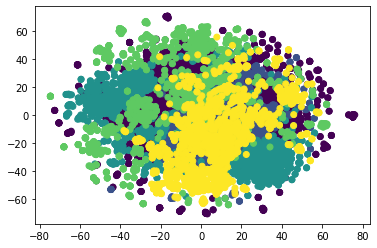

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

TSNE(learning_rate=10) :

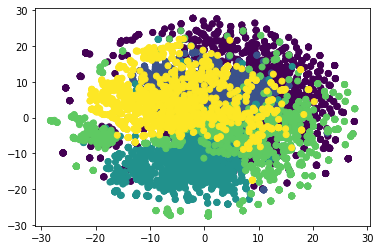

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

learning = 800

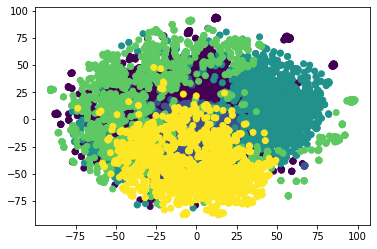

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

learning = 1000

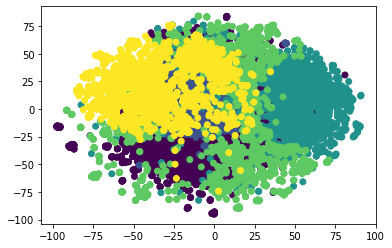

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

learning = 500

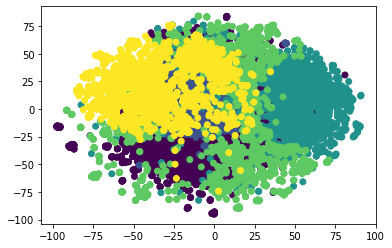

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

#### PCA 3d scatter

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(df)

PCA(n_components=3)

In [ ]:
len(pca.components_[0])

4447

In [ ]:
import plotly.express as px

In [ ]:
pca_features = pca.transform(df)

In [ ]:
pca_features[:,0]

array([-0.02899962, -0.02633691, -0.03041476, ..., -0.00945665,
       -0.0109651 , -0.00520785])

In [ ]:
pca_features

array([[-0.02899234, -0.00544927,  0.00444661],
       [-0.02633784,  0.01293008,  0.00207588],
       [-0.03041329,  0.00019163,  0.00451245],
       ...,
       [-0.00945037, -0.0059972 , -0.01359621],
       [-0.01095392, -0.0110673 , -0.00773721],
       [-0.00520312, -0.01216432, -0.01205312]])

In [ ]:
fig = px.scatter_3d(df, x=pca_features[:,0], y=pca_features[:,1], z=pca_features[:,2],
              color=real_labels)
fig.show()

#### Redukcja do jakiego wymiaru?

In [ ]:
pca = PCA()

In [ ]:
pca.fit(df)

PCA()

In [ ]:
pca.explained_variance_[:50]

array([0.0066335 , 0.00452005, 0.00375035, 0.00335259, 0.0030938 ,
       0.00273103, 0.0024604 , 0.00233004, 0.0022646 , 0.002199  ,
       0.00217994, 0.00206585, 0.0020333 , 0.00195293, 0.00182597,
       0.00181042, 0.00175153, 0.00165942, 0.00162813, 0.00162047,
       0.00155484, 0.00152689, 0.00146265, 0.00145205, 0.00144291,
       0.00142836, 0.00141658, 0.00138942, 0.0013632 , 0.00134773,
       0.00132082, 0.0013047 , 0.00128696, 0.00125492, 0.00124596,
       0.00122642, 0.00120953, 0.00119864, 0.00119016, 0.00117298,
       0.00116215, 0.00116004, 0.00114566, 0.00113276, 0.00110547,
       0.00109555, 0.00107219, 0.00105144, 0.00101915, 0.00100397])

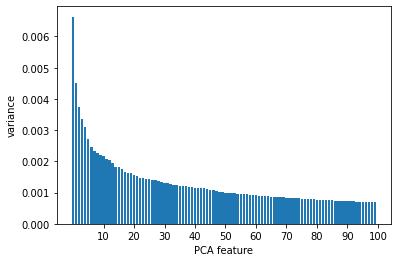

In [ ]:
features = range(100)
plt.bar(x=features, height=pca.explained_variance_[:100])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks([10,20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.show()

#### KMeans

fitujemy do df bez redukcji

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def test_model(max_k, X):
  score = []
  for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(X)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(kmeans.score(X))
  list_title = ['Within-cluster sum of squares']#, 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
  list_scores = [score] 
  for i in range(len(list_scores)):
      x_ticks = list(range(2, len(list_scores[i]) + 2))
      plt.plot(x_ticks, list_scores[i], 'bx-')
      plt.xlabel('k')
      plt.ylabel(list_title[i])
      plt.title('Optimal k')
      plt.show()

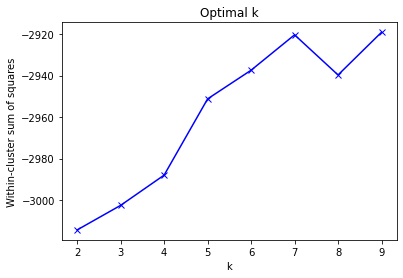

In [ ]:
test_model(10,df)

In [ ]:
model = KMeans(n_clusters=5)

In [ ]:
model.fit(df)

KMeans(n_clusters=5)

In [ ]:
labels = model.predict(df)

In [ ]:
labels_comp = pd.DataFrame(zip(list(labels), real_labels))

In [ ]:
labels_comp.columns=['labels', 'real_labels']

[enron_temp, nips_temp, kos_temp, nytimes_temp, pubmed_temp]

In [ ]:
pd.crosstab(labels_comp['labels'], labels_comp['real_labels'])

real_labels,0,1,2,3,4
labels,,,,,
0,35,0,0,0,0
1,1460,1500,1500,1499,933
2,0,0,0,0,15
3,5,0,0,0,0
4,0,0,0,0,552


#### NMF i DBscan

In [ ]:
nmf = NMF(10)

In [ ]:
nmf.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



NMF(n_components=10)

In [ ]:
nmf_features = nmf.transform(df)

In [ ]:
def compareLabels(labels, real_labels):
  labels_comp = pd.DataFrame(zip(list(labels), real_labels))
  labels_comp.columns=['labels', 'real_labels']
  return pd.crosstab(labels_comp['labels'], labels_comp['real_labels'])

In [ ]:
nmf_max_labels = list(pd.DataFrame(nmf_features).idxmax(1))

In [ ]:
labels_comp = pd.DataFrame(zip(list(nmf_max_labels), real_labels))

In [ ]:
pd.crosstab(labels_comp[0], labels_comp[1])

1,0,1,2,3,4
0,,,,,
0,1,13,0,7,399
1,62,2,1,3,2
2,3,1,1485,130,6
3,0,1,0,0,70
4,1,2,0,4,241
5,1397,1465,9,1311,87
6,0,16,1,37,422
7,0,0,0,0,135
8,0,0,0,0,137


In [ ]:
fig = px.scatter_3d(df, x=pca_features_for_plot[:,0], y=pca_features_for_plot[:,1], z=pca_features_for_plot[:,2],
              color=nmf_max_labels)
fig.show()

In [ ]:
nmf2= NMF(50)

In [ ]:
nmf2.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



NMF(n_components=50)

In [ ]:
nmf_labs = nmf2.transform(df)

In [ ]:
nmf3=NMF(20)
nmf3.fit(df)
nmf_labs2 = nmf3.transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [ ]:
kmed2 = KMedoids(n_clusters=7)

In [ ]:
kmed2.fit(nmf_labs)

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:279: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).



KMedoids(n_clusters=7)

In [ ]:
kmed2_labels = kmed2.predict(nmf_labs)

In [ ]:
fig = px.scatter_3d(df, x=pca_features_for_plot[:,0], y=pca_features_for_plot[:,1], z=pca_features_for_plot[:,2],
              color=kmed2_labels)
fig.show()

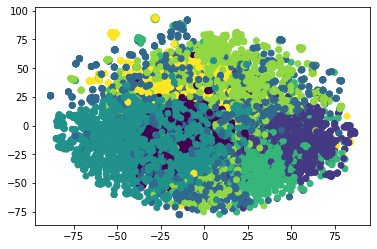

In [ ]:
plt.scatter(xs,ys,c=kmed2_labels)
plt.show()

In [ ]:
pd.value_counts(kmed2_labels)

0    1477
3    1390
5    1280
2    1193
1     818
4     674
6     667
dtype: int64

In [ ]:
wordsForCluster(kmed2_labels)

Słowa spod labelu :  5
       Unnamed: 0       word
1342         1342      basis
1469         1469     belong
1840         1840        boy
2135         2135        buy
4460         4460       diet
5998         5998     father
10560       10560  newspaper
14335       14335      sheet
16259       16259     tongue
16359       16359     trader 

Słowa spod labelu :  6
       Unnamed: 0        word
2238         2238       canal
2823         2823       click
9373         9373         lot
9815         9815     meeting
10449       10449  navigation
11397       11397         pay
13942       13942        save
14172       14172        sell
15175       15175         std
17820       17820         yes 

Słowa spod labelu :  2
       Unnamed: 0          word
168           168        active
6064         6064        female
6812         6812          girl
7608         7608       houston
11644       11644      physical
13270       13270      reported
13351       13351    resistance
14428       14428     

In [ ]:
nmf_labs

array([[0.00000000e+00, 0.00000000e+00, 9.02171226e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.30909585e-03, 0.00000000e+00, ...,
        9.03012694e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.20957931e-04, 0.00000000e+00, ...,
        7.00865281e-03, 2.97543031e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.46393717e-03, 6.21997691e-05, ...,
        1.58547548e-05, 0.00000000e+00, 0.00000000e+00],
       [7.62106149e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.67623522e-03, 1.75282777e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.71196879e-03, 8.27870642e-04]])

In [ ]:
compareLabels(kmed2_labels, real_labels)

real_labels,0,1,2,3,4
labels,,,,,
0,7,1447,0,2,59
1,4,0,402,8,0
2,10,33,2,2,185
3,4,9,0,18,1189
4,5,0,549,0,0
5,678,2,13,978,41
6,739,1,4,5,6
7,53,8,530,486,20


In [ ]:
pca_features

array([[-0.02899759, -0.0054337 ,  0.00448084, ..., -0.01214061,
         0.02459278, -0.01239439],
       [-0.026337  ,  0.01293657,  0.00210194, ..., -0.01899362,
         0.00250565,  0.00681565],
       [-0.03041432,  0.00020394,  0.00454431, ...,  0.0107971 ,
         0.00971735,  0.00410527],
       ...,
       [-0.0094581 , -0.00597728, -0.01356709, ..., -0.00469115,
         0.01839131,  0.03660826],
       [-0.01096574, -0.01103675, -0.00769235, ...,  0.00272805,
         0.02111677,  0.02005718],
       [-0.00520848, -0.0121604 , -0.01202171, ...,  0.0050384 ,
         0.02563621,  0.01738694]])

In [ ]:
nmf_labs

array([[0.00000000e+00, 0.00000000e+00, 9.02171226e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.30909585e-03, 0.00000000e+00, ...,
        9.03012694e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.20957931e-04, 0.00000000e+00, ...,
        7.00865281e-03, 2.97543031e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.46393717e-03, 6.21997691e-05, ...,
        1.58547548e-05, 0.00000000e+00, 0.00000000e+00],
       [7.62106149e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.67623522e-03, 1.75282777e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.71196879e-03, 8.27870642e-04]])

Najpierw redukcja

In [ ]:
model = KMeans(5)

In [ ]:
model.fit(nmf_features) 

KMeans(n_clusters=5)

In [ ]:
labels = model.predict(nmf_features)

In [ ]:
labels_comp = pd.DataFrame(zip(list(labels), real_labels))

In [ ]:
pd.crosstab(labels_comp[0], labels_comp[1])

1,0,1,2,3,4
0,,,,,
0,0,0,0,0,470
1,1464,1500,1500,1499,874
2,0,0,0,0,35
3,0,0,0,0,121
4,36,0,0,0,0


In [ ]:
dbscan = DBSCAN(eps=0.0085, min_samples=)

In [ ]:
dbscan.fit(nmf_features)

DBSCAN(eps=0.0085, min_samples=100)

In [ ]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
dbs_labels = list(dbscan.labels_)

In [ ]:
labels_comp = pd.DataFrame(zip(list(dbs_labels), real_labels))

In [ ]:
pd.crosstab(labels_comp[0], labels_comp[1])

1,0,1,2,3,4
0,,,,,
-1,1500,153,1500,1297,1487
0,0,1347,0,2,13
1,0,0,0,200,0


In [ ]:
dbscan2 = DBSCAN(eps=0.001, min_samples=(4447*2))

In [ ]:
dbscan2.fit(df)

DBSCAN(eps=0.001, min_samples=8894)

In [ ]:
dbs_labels = list(dbscan2.labels_)

In [ ]:
labels_comp = pd.DataFrame(zip(list(dbs_labels), real_labels))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Columns: 4447 entries, 18 to 49524
dtypes: float64(4447)
memory usage: 254.5 MB


##### NMF Topics

In [ ]:
nmf = NMF(10)
nmf.fit(df)

In [ ]:
nums = []
for x in list(df.columns):
  nums.append(int(x))

In [ ]:
dictionary.loc[dictionary['Unnamed: 0'].isin(nums)]['word'].reset_index(drop=True)[indexes]

2645            rat
513     cholesterol
4347    lipoprotein
2415         plasma
2576        protein
Name: word, dtype: object

In [ ]:
dictik = dictionary.loc[dictionary['Unnamed: 0'].isin(nums)]['word'].reset_index(drop=True)
def displayMostPopularWords(component):
  indexes = list(pd.DataFrame(zip(component, [x for x in range(len(component))])).sort_values(0, ascending=False).head(10)[1])
  return dictik[indexes]
  

In [ ]:
displayMostPopularWords(nmf.components_[0])

2645              rat
513       cholesterol
4347      lipoprotein
2415           plasma
2576          protein
47           activity
1905            liver
4352            serum
645     concentration
4339           enzyme
Name: word, dtype: object

In [ ]:
for component in nmf.components_:
  print(displayMostPopularWords(component), '\n')

2645              rat
513       cholesterol
4347      lipoprotein
2415           plasma
2576          protein
47           activity
1905            liver
4352            serum
645     concentration
4339           enzyme
Name: word, dtype: object 

2774       request
2789      resource
546          click
170       approval
2372     permanent
14      acceptance
73           admin
827           date
2836          risk
784         create
Name: word, dtype: object 

404         bush
1808       kerry
2440        poll
2200    november
2958      senate
1759        iraq
2141       nader
424     campaign
1575       house
3590         war
Name: word, dtype: object 

4444        thin-layer
4338    chromatography
2974        separation
4443            sterol
1382          fraction
2607      quantitative
1765         isolation
2971         separated
255          automated
583             column
Name: word, dtype: object 

32             acid
4186      synthesis
4349      oxidation
2485    preparatio

#### Clustering function

In [ ]:
kmeans = KMeans(8)
kmeans.fit(df)
labels = kmeans.predict(df)

In [ ]:
compareLabels(labels, real_labels)

real_labels,0,1,2,3,4
labels,,,,,
0,1463,1500,104,1496,838
1,0,0,0,0,300
2,2,0,1396,3,0
3,0,0,0,0,112
4,0,0,0,0,35
5,0,0,0,0,105
6,35,0,0,0,0
7,0,0,0,0,110


In [ ]:
df2 = df.copy()

In [ ]:
df2['label'] = labels

In [ ]:
df = df.drop(columns=['label'])

In [ ]:
df2.columns

Index(['18', '19', '20', '34', '38', '39', '43', '45', '47', '51',
       ...
       '46894', '47583', '48025', '48093', '48269', '49029', '49248', '49393',
       '49524', 'label'],
      dtype='object', length=4448)

In [ ]:
df2.loc[df2['label']==3].loc[0,:]

18       0.0
19       0.0
20       0.0
34       0.0
38       0.0
        ... 
49029    0.0
49248    0.0
49393    0.0
49524    0.0
label    3.0
Name: 0, Length: 4448, dtype: float64

In [ ]:
[int(x) for x in list(df.idxmax(axis=1))]

TypeError: ignored

In [ ]:
[int(x) for x in list(df.max().nlargest(20).index)]

[10560,
 14428,
 27933,
 11714,
 21219,
 44206,
 2238,
 15175,
 49248,
 24095,
 28228,
 18033,
 7707,
 11644,
 46113,
 26290,
 4460,
 6667,
 23889,
 27939]

In [ ]:
dictionary.loc[dictionary['Unnamed: 0']==4431]

,Unnamed: 0,word
4431,4431,diagnostic


In [ ]:
for x in df2.loc[df2['label']==3]:
  print(x)

In [ ]:
def wordsForCluster(labels):
  for label in pd.unique(labels):
    print('Słowa spod labelu : ', label)
    print(dictionary[dictionary['Unnamed: 0'].isin([int(x) for x in list(df.loc[labels==label].mean().nlargest(10).index)])].values, '\n')

In [ ]:
print(dictionary[dictionary['Unnamed: 0'].isin([int(x) for x in list(df.loc[labels==1].mean().nlargest(10).index)])])

       Unnamed: 0      word
487           487     allen
1032         1032  attached
6015         6015       fax
6118         6118      file
6530         6530    friday
7608         7608   houston
8506         8506      jeff
9815         9815   meeting
11618       11618   phillip
16253       16253  tomorrow


In [ ]:
compareLabels(labels, real_labels)

real_labels,0,1,2,3,4
labels,,,,,
0,421,0,1,8,12
1,472,0,3,1,0
2,34,1,0,10,1305
3,4,0,610,40,0
4,547,6,193,1440,81
5,0,0,693,0,0
6,22,1493,0,0,102


In [ ]:
wordsForCluster(labels)

Słowa spod labelu :  0
       Unnamed: 0     word
873           873   arnold
2135         2135      buy
4346         4346     desk
6694         6694      gas
6873         6873    going
9617         9617   market
16082       16082    think
16359       16359   trader
16360       16360   trades
16361       16361  trading 

Słowa spod labelu :  4
       Unnamed: 0       word
2823         2823      click
3082         3082    company
6660         6660       game
7515         7515       home
9346         9346       look
10560       10560  newspaper
11744       11744       plan
14099       14099     season
15876       15876       team
20930       20930    million 

Słowa spod labelu :  1
       Unnamed: 0      word
487           487     allen
1032         1032  attached
6015         6015       fax
6118         6118      file
6530         6530    friday
7608         7608   houston
8506         8506      jeff
9815         9815   meeting
11618       11618   phillip
16253       16253  tomorrow 

S

In [ ]:
labels = kmeans.predict(df)

In [ ]:
wordsForCluster(labels)

Słowa spod labelu :  1
       Unnamed: 0      word
873           873    arnold
2823         2823     click
7608         7608   houston
7707         7707       ice
9373         9373       lot
11714       11714     pitch
13270       13270  reported
14335       14335     sheet
16359       16359    trader
17820       17820       yes 

Słowa spod labelu :  2
       Unnamed: 0          word
2238         2238         canal
10560       10560     newspaper
11714       11714         pitch
14428       14428     showtimes
15175       15175           std
21219       21219  neuroscience
24095       24095       herseth
27933       27933           fff
28228       28228           fxf
44206       44206    amino_acid 

Słowa spod labelu :  3
       Unnamed: 0          word
796           796      approval
2574         2574         chart
6843         6843        global
8506         8506          jeff
10441       10441   natural_gas
11015       11015  organization
11618       11618       phillip
13293      

#### GMM 

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=5)

In [ ]:
pca = PCA(50)

In [ ]:
pca.fit(df)

PCA(n_components=50)

In [ ]:
pca_features = pca.transform(df)

In [ ]:
gmm.fit(pca_features)

GaussianMixture(n_components=5)

In [ ]:
labels = gmm.predict(pca_features)

In [ ]:
compareLabels(labels, real_labels)

real_labels,0,1,2,3,4
labels,,,,,
0,183,1412,1187,1287,21
1,25,75,2,124,573
2,1285,10,311,85,5
3,7,3,0,3,873
4,0,0,0,0,28


#### K-Medioids

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
! pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.9 MB/s 


In [ ]:
from sklearn_extra.cluster import KMedoids


In [ ]:
df = df.drop(columns=['len'])
#df['len'] = lenghts['length']

In [ ]:
kmed = KMedoids(n_clusters=7, random_state=42)

In [ ]:
df = scaler.transform(df)

In [ ]:
df

array([[-0.07030121, -0.13193187, -0.15957013, ..., -0.07924505,
        -0.067928  , -0.11601074],
       [-0.07030121, -0.13193187,  2.3980867 , ..., -0.07924505,
        -0.067928  , -0.11601074],
       [-0.07030121, -0.13193187, -0.15957013, ..., -0.07924505,
        -0.067928  , -0.11601074],
       ...,
       [-0.07030121, -0.13193187, -0.15957013, ..., -0.07924505,
        -0.067928  , -0.11601074],
       [-0.07030121, -0.13193187, -0.15957013, ..., -0.07924505,
        -0.067928  , -0.11601074],
       [-0.07030121, -0.13193187, -0.15957013, ..., -0.07924505,
        -0.067928  ,  4.17917096]])

In [ ]:
pca = PCA(50, random_state=42)
pca.fit(df)
pca_features = pca.transform(df)

In [ ]:
kmed.fit(pca_features)

KMedoids(n_clusters=7, random_state=42)

In [ ]:
labels = kmed.predict(pca_features)

In [ ]:
pd.value_counts(labels)

5    1561
3    1485
2    1435
6    1017
0     812
4     656
1     533
dtype: int64

In [ ]:
compareLabels(labels, real_labels)

real_labels,0,1,2,3,4
labels,,,,,
0,421,0,1,8,12
1,472,0,3,1,0
2,34,1,0,10,1305
3,4,0,610,40,0
4,547,6,193,1440,81
5,0,0,693,0,0
6,22,1493,0,0,102


In [ ]:
[int(x) for x in list(df.loc[labels==0].max().nlargest(10).index)]

[11714, 15175, 7707, 11644, 873, 9373, 16359, 2552, 14335, 13820]

In [ ]:
df.loc[labels==0].mean().nlargest(10).index

Index(['6694', '2135', '16082', '16361', '4346', '16359', '9617', '6873',
       '873', '16360'],
      dtype='object')

In [ ]:
pca2 = PCA(n_components=3)

In [ ]:
pca2.fit(df)

PCA(n_components=3)

In [ ]:
pca_features_for_plot = pca2.transform(df)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df, x=pca_features_for_plot[:,0], y=pca_features_for_plot[:,1], z=pca_features_for_plot[:,2],
              color=labels)
fig.show()

In [ ]:
def metrics_plots(X,max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMedoids(n_clusters=k, random_state= 42)
        predictions = kmeans.fit_predict(X)
        # Calculate cluster validation metrics and append to lists of metrics
        #score.append(kmeans.score(X))
        score_kmeans_s.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(X, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(X, predictions))

    list_scores = [score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    # Elbow Method plot
    list_title = ['Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

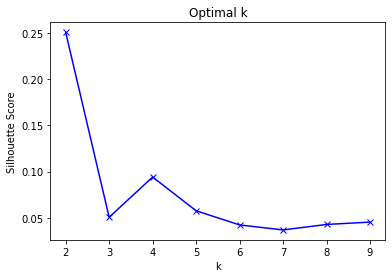

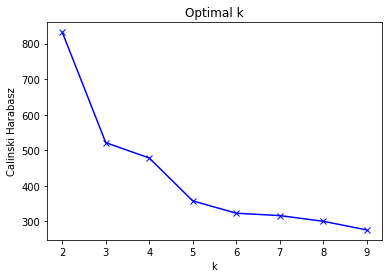

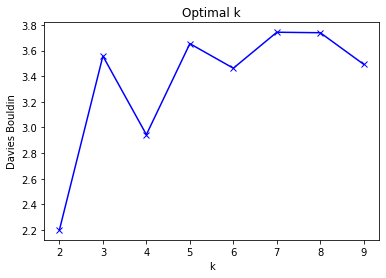

In [ ]:
metrics_plots(pca_features)

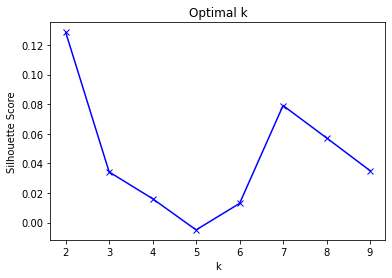

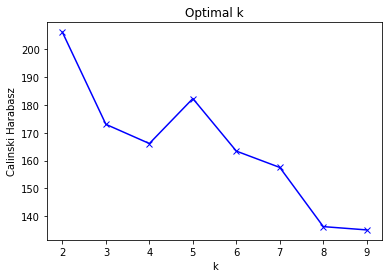

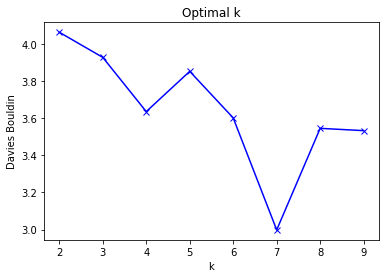

In [ ]:
metrics_plots(pca_features)

In [ ]:
compareLabels(labels, real_labels)

real_labels,0,1,2,3,4
labels,,,,,
0,421,0,1,8,12
1,472,0,3,1,0
2,34,1,0,10,1305
3,4,0,610,40,0
4,547,6,193,1440,81
5,0,0,693,0,0
6,22,1493,0,0,102


In [ ]:
wordsForCluster(labels)

Słowa spod labelu :  0
[[873 'arnold']
 [2135 'buy']
 [4346 'desk']
 [6694 'gas']
 [6873 'going']
 [9617 'market']
 [16082 'think']
 [16359 'trader']
 [16360 'trades']
 [16361 'trading']] 

Słowa spod labelu :  4
[[2823 'click']
 [3082 'company']
 [6660 'game']
 [7515 'home']
 [9346 'look']
 [10560 'newspaper']
 [11744 'plan']
 [14099 'season']
 [15876 'team']
 [20930 'million']] 

Słowa spod labelu :  1
[[487 'allen']
 [1032 'attached']
 [6015 'fax']
 [6118 'file']
 [6530 'friday']
 [7608 'houston']
 [8506 'jeff']
 [9815 'meeting']
 [11618 'phillip']
 [16253 'tomorrow']] 

Słowa spod labelu :  6
[[464 'algorithm']
 [6595 'function']
 [8102 'input']
 [9021 'learning']
 [10146 'model']
 [10534 'network']
 [10538 'neural']
 [16379 'training']
 [16811 'unit']
 [21206 'neuron']] 

Słowa spod labelu :  2
[[134 'acid']
 [173 'activity']
 [2459 'cell']
 [2669 'cholesterol']
 [3197 'concentration']
 [11370 'patient']
 [12729 'rat']
 [26290 'chromatography']
 [29635 'lipid']
 [45851 'fatty_acid

In [ ]:
# enron_temp, nips_temp, kos_temp, nytimes_temp, pubmed_temp

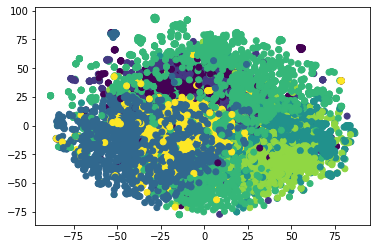

In [ ]:
plt.scatter(xs,ys,c=labels)
plt.show()